In [11]:

data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction assesement result/Spacemap_CA_result(Variable_HBR)/Spacemap_CA_09m24d13h_HBR.csv')
data

,Unnamed: 0,INDEX,TCA_RANGE,TCA_RELATIVE_SPEED,HBR_SPACEMAP,HBR_CELESTRAK,PC_SPACEMAP,PC_CELESTRAK,ERROR(RATIO),NORAD_CAT_ID_1,...,DEPTH_1,NORAD_CAT_ID_2,OBJECT_NAME_2,OBJECT_CLASS_2,SHAPE_2,SPAN_2,DIAMETER_2,HEIGHT_2,WIDTH_2,DEPTH_2
0,0,0,0.026,9.746,0.00740,0.001753,7.936720e-02,4.983000e-03,15.927593,40059,...,NaN,48624,CZ-4B R/B [-],Rocket Body,Cyl,7.5,2.9,7.50,NaN,NaN
1,1,1,0.026,0.162,0.00025,0.001974,1.020234e-04,6.308000e-03,0.016174,51831,...,0.2,56863,OBJECT T [+],Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,0.032,14.943,0.00105,0.001246,1.186326e-03,1.669000e-03,0.710801,48041,...,0.1,37495,COSMOS 2251 DEB [-],Payload Fragmentation Debris,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,0.035,8.994,0.00925,0.001796,6.954520e-02,2.894000e-03,24.030823,43065,...,2.5,40438,DMSP 5D-2 F13 DEB [-],Payload Fragmentation Debris,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,0.038,7.698,0.00713,0.005688,3.687280e-02,2.391000e-02,1.542150,49727,...,1.5,39679,SL-4 R/B [-],Rocket Body,Cyl,6.7,2.7,6.70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36492,36492,36492,5.000,7.775,0.00543,0.005615,1.301624e-06,1.392000e-06,0.935075,48005,...,1.5,57326,OBJECT BA [-],Unknown,NaN,NaN,NaN,NaN,NaN,NaN
36493,36493,36493,5.000,9.061,0.00493,0.005453,1.072951e-06,1.313000e-06,0.817175,52880,...,1.5,55327,HAWK-6A [+],Payload,Box + 2 Pan,1.0,NaN,0.45,0.3,0.3
36494,36494,36494,5.000,13.584,0.00543,0.004391,1.301624e-06,8.510000e-07,1.529523,55353,...,1.5,57325,OBJECT AZ [-],Unknown,NaN,NaN,NaN,NaN,NaN,NaN
36495,36495,36495,5.000,15.077,0.00115,0.001202,5.838246e-08,6.382000e-08,0.914799,56223,...,NaN,43841,OBJECT L [-],Payload,Box,0.3,NaN,0.30,0.1,0.1


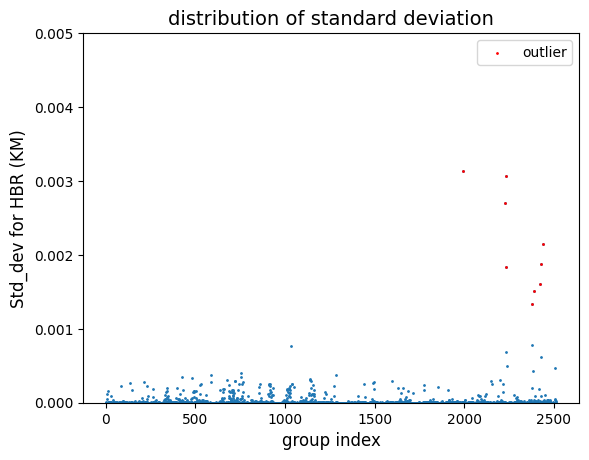

In [14]:
import pandas as pd
from matplotlib import pyplot as plt

#데이터 불러오기
# data = pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano6/Alfano6_24d13h_total_HBR.csv')  # ground
data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction assesement result/Spacemap_CA_result(Variable_HBR)/Spacemap_CA_09m24d13h_HBR.csv')

#위성번호로 그룹 데이터프레임 생성, 개수와 표준편차 계산
pair = data.groupby(['NORAD_CAT_ID_1', 'NORAD_CAT_ID_2']).agg({'HBR_CELESTRAK': ['count', 'std']}).reset_index()
pair.columns = ['satno', 'satno2', 'count', 'std_dev']

# Conjunction event 2회이상인 pair만 저장.
pair_2 = pair[pair['count'] > 1]
pair_2 = pair_2.reset_index()

# pair_2의 표준편차의 분포
plt.scatter(range(len(pair_2)),pair_2['std_dev'],s=1)
plt.scatter(list(pair_2[pair_2['std_dev']>0.001].index),\
            pair_2[pair_2['std_dev']>0.001]['std_dev'],color='r',s=1,label='outlier') # 0.001보다 큰 값 표시

plt.xlabel("group index",fontsize=12)
plt.ylabel("Std_dev for HBR (KM)",fontsize=12)
plt.title("distribution of standard deviation",fontsize=14)
plt.ylim(0,0.005)
plt.legend()